# Maximum Likelihood Estimation

## Probability distribution case

In [1]:
import numpy as np
import matplotlib.pyplot as plt

(1000,)


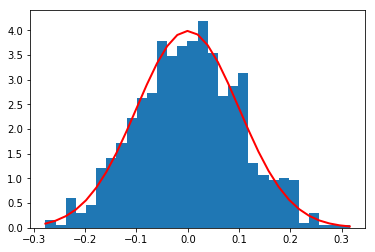

In [2]:
mu, sigma = 0, 0.1 # mean and standard deviation
data = np.random.normal(mu, sigma, 1000)
print(data.shape)

count, bins, ignored = plt.hist(data, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

In [3]:
from UQpy.Inference import Model
candidate_model = Model(model_type = 'pdf', model_name='normal')

['normal', 'uniform', 'binomial', 'beta', 'genextreme', 'chisquare', 'lognormal', 'gamma', 'exponential', 'cauchy', 'levy', 'logistic', 'laplace', 'maxwell', 'inv_gauss', 'pareto', 'rayleigh']


In [4]:
from UQpy.Inference import MLEstimation
ml_estimator = MLEstimation(model_instance=candidate_model, data=data)
print('ML estimates of the mean={}, std. dev={}'.format(ml_estimator.param[0], ml_estimator.param[1]))

ML estimates of the mean=0.0029464102327762722, std. dev=0.1002969887665375


## Linear model case <3

In [10]:
# Generate data
from scipy.stats import multivariate_normal

param_true = np.array([1.0, 2.0]).reshape(1, -1)
error_covariance = np.eye(50)

print(param_true.shape)
from UQpy.RunModel import RunModel
z = RunModel(samples=param_true, model_type='python', model_script='pfn_linear.py')

data = z.model_eval.QOI[0]+multivariate_normal.rvs(mean=None, cov=error_covariance, size=1)
print(data)

(1, 2)

Evaluating the model...

[  2.63969721   1.30739665   0.53964321   1.03881976   1.87490348
   2.36680697   3.70128648   6.05922595   7.50083345   9.14171596
   9.38477141  12.35713914  13.55732223  16.7718447   18.41561157
  22.91229873  24.14209213  27.5550851   30.91935293  33.46431531
  37.63846884  41.51836616  43.90968402  48.20228627  53.02189077
  57.16238643  61.44566688  67.17645023  71.6033794   77.55805434
  80.78460204  87.56102243  92.2761741   97.83451168 103.46473181
 107.98875728 116.17858763 121.74162436 127.86672389 135.75088638
 141.40652089 148.76282767 156.15399519 161.61992582 170.85931367
 177.04802091 184.63608729 193.97227092 202.78591789 211.00801706]


In [11]:
candidate_model = Model(model_type='python', model_script='pfn_linear.py', n_params=2, 
                        error_covariance=error_covariance)

In [12]:
ml_estimator = MLEstimation(model_instance=candidate_model, data=data)


Evaluating the model...

233232.90116407993

Evaluating the model...


Evaluating the model...

233226.0927643105

Evaluating the model...


Evaluating the model...

233178.10116075163

Evaluating the model...


Evaluating the model...

233171.29355817608

Evaluating the model...


Evaluating the model...

233140.4928082375

Evaluating the model...


Evaluating the model...

233092.5100174973

Evaluating the model...


Evaluating the model...

233025.73300444178

Evaluating the model...


Evaluating the model...

232988.13693687104

Evaluating the model...


Evaluating the model...

232893.18386168565

Evaluating the model...


Evaluating the model...

232778.48497914546

Evaluating the model...


Evaluating the model...

232597.58659477156

Evaluating the model...


Evaluating the model...

232465.15930453668

Evaluating the model...


Evaluating the model...

232185.12568005925

Evaluating the model...


Evaluating the model...

231889.97844742

Evaluating the model...


Evaluating 

In [13]:
print(ml_estimator.param)

[1.00108924 2.00298689]
